In [7]:
from codes.python import load_database,ECG_denoising
from codes.python import QRS_detector
import numpy as np
from scipy import signal
from scipy.signal import savgol_filter
import operator
from numpy import array
import sys
import csv
import os
import matplotlib.pyplot as plt
import wfdb
from wfdb import processing, plot
from codes.python import heartbeat_segmentation as shs
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import pandas as pd
from codes.python import curve_smoothing 
import pywt
from biosppy.signals import ecg
from sklearn import metrics
#import waipy
import operator


In [13]:
def average(numbers):
    return float(sum(numbers)) / len(numbers)

In [12]:
def peak_properties_extractor(sig,start_point=None,end_point=None,height=None, distance=None, width = None, plateau_size=None):
    sig = sig[start_point:end_point]
    peaks,properties  = np.asarray(signal.find_peaks(sig, height=height, distance=distance,width=width,plateau_size=plateau_size))
    return peaks,properties

def point_transform_to_origin(por,point):
    point_from_origin = por + point 
    return point_from_origin

def origin_to_new_point(por,point_from_origin):
    point = point_from_origin - por
    return point

def peak_duration(time,right_edge, left_edge,point_from_origin):
    right_edge = point_transform_to_origin(point_from_origin,right_edge)
    left_edge = point_transform_to_origin(point_from_origin,left_edge)
    
    return float(time[right_edge]-time[left_edge])

def sub_signal_interval(time, start_point, end_point,point_from_origin):
    start_point = point_transform_to_origin(point_from_origin,start_point)
    end_point = point_transform_to_origin(point_from_origin,end_point)
    
    return float(time[end_point]-time[start_point])

def peak_height(signal, peak, prominence,point_from_origin):
    peak = point_transform_to_origin(point_from_origin,peak)
    height = signal[peak]-(signal[peak] - prominence)
    return height

def area_under_curve(signal,time,samples,point_from_origin):
    samples = [point_transform_to_origin(i,point_from_origin) for i in samples]
    time = np.asarray(time)
    amplitude = np.asarray(signal)
    area = metrics.auc(time[samples],amplitude[samples])
    return area

def amplitude(signal,samples,point_from_origin):
    samples = [point_transform_to_origin(i,point_from_origin) for i in samples]
    signal = np.asarray(signal)
    amplitudes = signal[samples]
    return amplitudes

In [10]:
mitdb = load_database.load_mitdb()
mitdb.segment_beats()

C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/100
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/csv/100.csv
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/csv/100.txt
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/p_t_wave/100pt.csv
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/101
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/csv/101.csv
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/csv/101.txt
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/p_t_wave/101pt.csv
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/102
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/csv/102.csv
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/csv/102.txt
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/p_t_wave/102pt

C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/csv/201.txt
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/p_t_wave/201pt.csv
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/202
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/csv/202.csv
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/csv/202.txt
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/p_t_wave/202pt.csv
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/203
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/csv/203.csv
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/csv/203.txt
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/p_t_wave/203pt.csv
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/205
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/csv/205

Filtered MLII records from : 102
start segmenting MLII.
Finished segmenting MLII.
Segmenting record 102 completes.
Start segmenting records: 103
Filtered MLII records from : 103
start segmenting MLII.
Finished segmenting MLII.
Segmenting record 103 completes.
Start segmenting records: 104
Filtered MLII records from : 104
start segmenting MLII.
Finished segmenting MLII.
Segmenting record 104 completes.
Start segmenting records: 105
Filtered MLII records from : 105
start segmenting MLII.
Finished segmenting MLII.
Segmenting record 105 completes.
Start segmenting records: 106
Filtered MLII records from : 106
start segmenting MLII.
Finished segmenting MLII.
Segmenting record 106 completes.
Start segmenting records: 107
Filtered MLII records from : 107
start segmenting MLII.
Finished segmenting MLII.
Segmenting record 107 completes.
Start segmenting records: 108
Filtered MLII records from : 108
start segmenting MLII.
Finished segmenting MLII.
Segmenting record 108 completes.
Start segmentin

In [5]:
[print(mitdb.patient_records[file].filename, file) for file in range(0,len(mitdb.patient_records))]


100 0
101 1
102 2
103 3
104 4
105 5
106 6
107 7
108 8
109 9
111 10
112 11
113 12
114 13
115 14
116 15
117 16
118 17
119 18
121 19
122 20
123 21
124 22
200 23
201 24
202 25
203 26
205 27
207 28
208 29
209 30
210 31
212 32
213 33
214 34
215 35
217 36
219 37
220 38
221 39
222 40
223 41
228 42
230 43
231 44
232 45
233 46
234 47


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [38]:
mit100 = mitdb.patient_records[0]


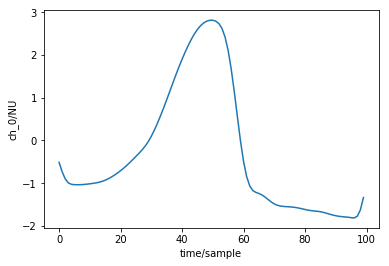

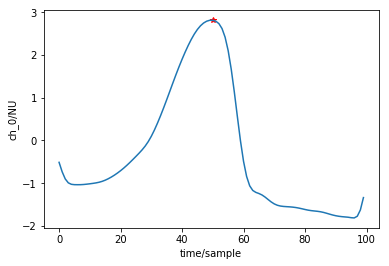

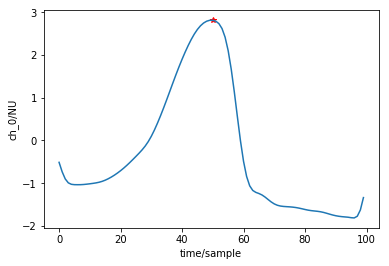

3.850479241305454

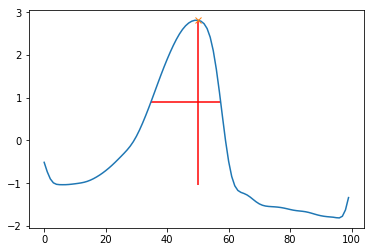

In [7]:
sig = mit100.MLII[164995-50:164995+50]

filter_FIR = ECG_denoising.ECG_FIR_filter()

filtered_signal = ECG_denoising.denoising_signal_FIR(sig,filter_FIR)
fitlered100 = filtered_signal
savgol_signal = savgol_filter(filtered_signal,51,7)

wfdb.plot_items(signal=filtered_signal)

peaks,properties = peak_properties_extractor(filtered_signal,height=None, distance=20, width = [5,100], plateau_size=[0,100])
#peaks,properties  = np.asarray(signal.find_peaks(filtered_signal, height=min(filtered_signal), distance=20,width=[5,100],plateau_size=[0,100] ))#, max_distances=np.arange(1, 100)/4)
wfdb.plot_items(signal=filtered_signal,ann_samp=[peaks])

left_base = np.asarray(properties["left_bases"])
right_bases = np.asarray(properties["right_bases"])
left_ips = np.asarray(properties["left_ips"])
right_ips = np.asarray(properties["right_ips"])
left_ips = [int(i) for i in left_ips]
right_ips = [int(i) for i in right_ips]

left_ips = np.asarray(left_ips)
right_ips = np.asarray(right_ips)
wfdb.plot_items(signal=filtered_signal, ann_samp=[peaks])

plt.plot(filtered_signal)
plt.plot(peaks, filtered_signal[peaks], "x")
plt.vlines(x=peaks, ymin=filtered_signal[peaks] - properties["prominences"],ymax = filtered_signal[peaks], color = "r1")
plt.hlines(y=properties["width_heights"], xmin=properties["left_ips"],xmax=properties["right_ips"], color = "r1")
len(peaks)
peak_height(mit100.filtered_MLII, peaks[0], properties["prominences"][0],164995-50)

In [8]:
mit207 = mitdb.patient_records[28]

In [39]:
sig = []
peaks = []
properites_list= []
heights = []
durations = []
areas = []
onset = []
offset = []
max_peaks = []
min_peaks = []

for r in mit100.segmented_R_pos:
    
    distance=20
    width = [0,100] 
    plateau_size=[0,100]
    start_point = r-50
    end_point = r+50
   
    if(mit100.filtered_MLII[r] >= 0):
        sig = mit100.filtered_MLII[start_point:end_point]
        height = min(sig)   
        peak,properties = peak_properties_extractor(sig,height=height, distance=distance, width = width, plateau_size=plateau_size)
    else:
        sig = -mit100.filtered_MLII[start_point:end_point]
        height = min(sig)   
        peak,properties = peak_properties_extractor(sig,height=height, distance=distance, width = width, plateau_size=plateau_size)
    
    
    savgol_signal = savgol_filter(sig,41,9)
    height = min(savgol_signal)   
    peak_savol,properties_savol = peak_properties_extractor(savgol_signal,height=height, distance=distance, width = width, plateau_size=plateau_size)
    #print()
    #print(peak)
    savgol_signal = savgol_signal[peak_savol]
    #print(peak_savol)
    #print(sig)
    value = max(savgol_signal)
    #print(value)
    if(len(peak_savol) == 0):
        print(len(peak_savol),r)
        print(peak_savol)
    index = np.where(savgol_signal==value)
    #print(index)
    #print(index)
    index = int(index[0])
    
    peak_savol = peak_savol[index]
    peak_savol = point_transform_to_origin(start_point,peak_savol)
    peaks.append(peak_savol)
    left_ips = np.asarray(properties_savol["left_ips"])
    
    right_ips = np.asarray(properties_savol["right_ips"])
    left_ips = [int(i) for i in left_ips]
    right_ips = [int(i) for i in right_ips]
    
    left_edge = left_ips[index]
    right_edge = right_ips[index]
    
    
    duration = round(peak_duration(time=mit100.time,right_edge=right_edge, left_edge=left_edge,point_from_origin=start_point),3)
    if(duration<0.01):
        min_peaks.append(r)
    durations.append(duration)
    
    
   
    #properites_list.append(properties)


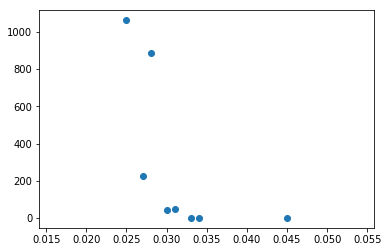

In [40]:
x ,y  = np.unique(durations, return_counts=True) # counting occurrence of each loan
plt.scatter(x,y)

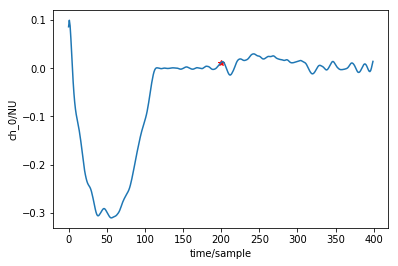

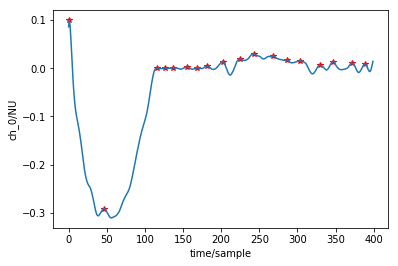

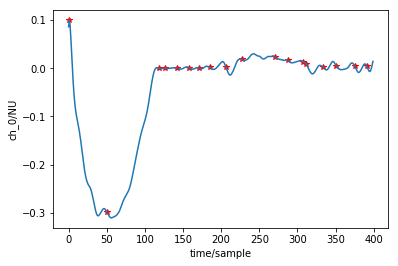

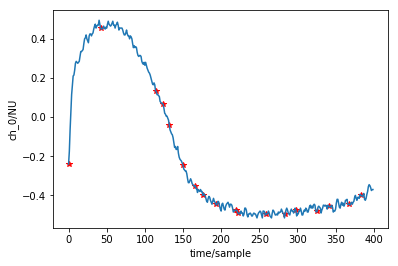

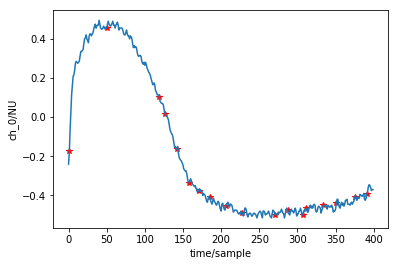

In [12]:
index = list(range(21826-200,21826+200))
sig = -mit207.MLII[21826-200:21826+200]
fitlered100 = mit207.MLII[21826-200:21826+200]
filter_FIR = ECG_denoising.ECG_FIR_filter()


filtered_signal = ECG_denoising.denoising_signal_FIR(sig,filter_FIR)
savgol_signal = savgol_filter(filtered_signal,41,9)
r_pos = np.asarray(shs.r_peak_detector(mit207.filtered_MLII,mit207.annotations,index))
wfdb.plot_items(signal=savgol_signal,ann_samp=[r_pos])

peaks,properties  = np.asarray(signal.find_peaks(savgol_signal, height=min(savgol_signal), distance=10,width=[0,100],plateau_size=[0,100] ))#, max_distances=np.arange(1, 100)/4)
wfdb.plot_items(signal=savgol_signal,ann_samp=[peaks])

left_base = np.asarray(properties["left_bases"])
right_bases = np.asarray(properties["right_bases"])
left_ips = np.asarray(properties["left_ips"])
right_ips = np.asarray(properties["right_ips"])
left_ips = [int(i) for i in left_ips]
right_ips = [int(i) for i in right_ips]

left_ips = np.asarray(left_ips)
right_ips = np.asarray(right_ips)
wfdb.plot_items(signal=savgol_signal,ann_samp=[right_ips])
wfdb.plot_items(signal=fitlered100, ann_samp=[left_ips])
wfdb.plot_items(signal=fitlered100, ann_samp=[right_ips])


NameError: name 'mitdb' is not defined

In [44]:
samples = list(range(left_edge,right_edge+1))
type(samples[0])
time = np.asarray(mit100.time)
time[samples]
type(mit100.filename)

dic100["durations"]

[0.028,
 0.025,
 0.025,
 0.025,
 0.025,
 0.028,
 0.028,
 0.025,
 0.025,
 0.025,
 0.025,
 0.025,
 0.025,
 0.028,
 0.025,
 0.025,
 0.027,
 0.028,
 0.028,
 0.028,
 0.028,
 0.025,
 0.028,
 0.025,
 0.027,
 0.025,
 0.025,
 0.028,
 0.025,
 0.028,
 0.028,
 0.028,
 0.028,
 0.025,
 0.028,
 0.025,
 0.028,
 0.028,
 0.028,
 0.025,
 0.025,
 0.027,
 0.025,
 0.027,
 0.028,
 0.025,
 0.025,
 0.025,
 0.025,
 0.025,
 0.028,
 0.025,
 0.028,
 0.025,
 0.028,
 0.028,
 0.028,
 0.025,
 0.028,
 0.03,
 0.025,
 0.025,
 0.025,
 0.028,
 0.025,
 0.027,
 0.028,
 0.028,
 0.025,
 0.027,
 0.025,
 0.028,
 0.028,
 0.025,
 0.025,
 0.025,
 0.025,
 0.025,
 0.025,
 0.025,
 0.028,
 0.025,
 0.025,
 0.025,
 0.028,
 0.025,
 0.025,
 0.028,
 0.028,
 0.025,
 0.028,
 0.025,
 0.028,
 0.025,
 0.028,
 0.027,
 0.025,
 0.025,
 0.027,
 0.025,
 0.028,
 0.027,
 0.025,
 0.025,
 0.025,
 0.025,
 0.028,
 0.025,
 0.028,
 0.028,
 0.028,
 0.028,
 0.025,
 0.025,
 0.028,
 0.028,
 0.025,
 0.025,
 0.025,
 0.028,
 0.025,
 0.028,
 0.025,
 0.028,
 0.025,
 

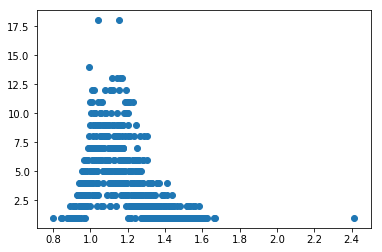

In [46]:
x ,y  = np.unique(dic100["durations"], return_counts=True) # counting occurrence of each loan
plt.scatter(x,y)


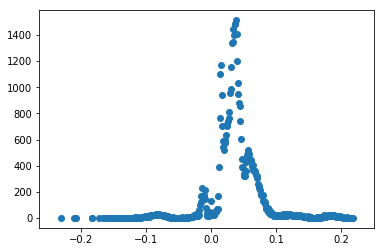

In [26]:
x ,y  = np.unique(all_area, return_counts=True) # counting occurrence of each loan
plt.scatter(x,y)


In [11]:
sig = []
peaks = []
properites_list= []
heights = []
durations = []
areas = []
onset = []
offset = []
max_peaks = []
min_peaks = []

for r in patient.segmented_R_pos:
    
    distance=20
    width = [0,100] 
    plateau_size=[0,100]
    start_point = r-50
    end_point = r+50
   
    if(patient.filtered_MLII[r] >= 0):
        sig = patient.filtered_MLII[start_point:end_point]
        height = min(sig)   
        peak,properties = peak_properties_extractor(sig,height=height, distance=distance, width = width, plateau_size=plateau_size)
    else:
        sig = -patient.filtered_MLII[start_point:end_point]
        height = min(sig)   
        peak,properties = peak_properties_extractor(sig,height=height, distance=distance, width = width, plateau_size=plateau_size)
    
    
    savgol_signal = savgol_filter(sig,41,9)
    height = min(savgol_signal)   
    peak_savol,properties_savol = peak_properties_extractor(savgol_signal,height=height, distance=distance, width = width, plateau_size=plateau_size)
    #print()
    #print(peak)
    savgol_signal = savgol_signal[peak_savol]
    #print(peak_savol)
    #print(sig)
    value = max(savgol_signal)
    #print(value)
    if(len(peak_savol) == 0):
        print(len(peak_savol),r)
        print(peak_savol)
    index = np.where(savgol_signal==value)
    #print(index)
    #print(index)
    index = int(index[0])
    
    peak_savol = peak_savol[index]
    peak_savol = point_transform_to_origin(start_point,peak_savol)
    peaks.append(peak_savol)
    left_ips = np.asarray(properties_savol["left_ips"])
    right_ips = np.asarray(properties_savol["right_ips"])
    left_ips = [int(i) for i in left_ips]
    right_ips = [int(i) for i in right_ips]
    
    left_edge = left_ips[index]
    right_edge = right_ips[index]
    
    
    duration = round(peak_duration(time=patient.time,right_edge=right_edge, left_edge=left_edge,point_from_origin=start_point),3)
    if(duration<0.01):
        min_peaks.append(r)
    durations.append(duration)
    
   
    #properites_list.append(properties)

NameError: name 'patient' is not defined

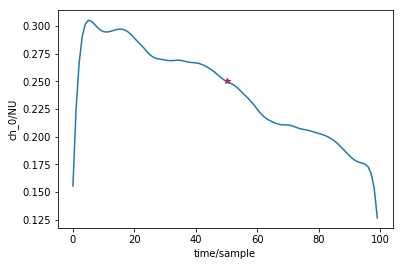

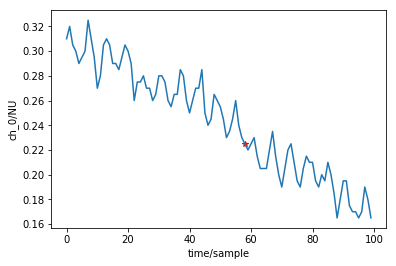

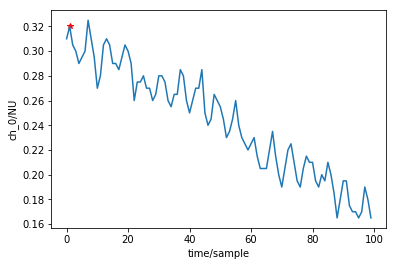

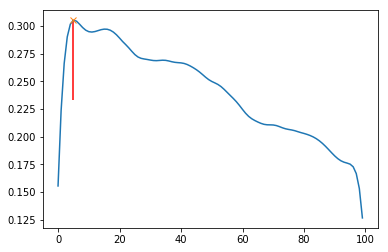

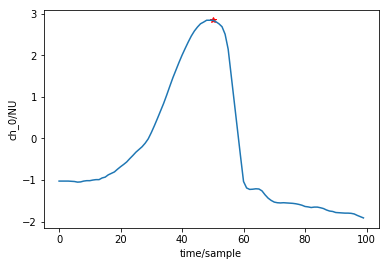

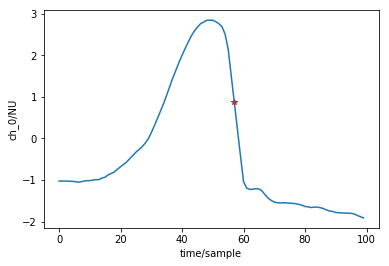

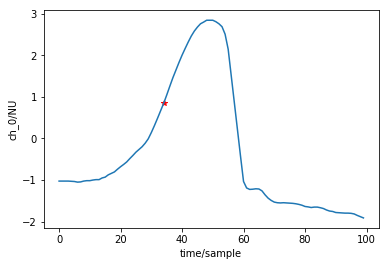

0.07167724938511448


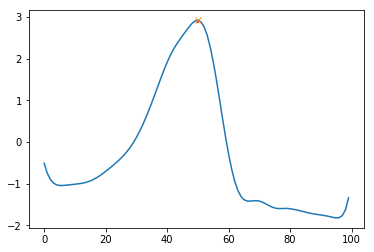

In [101]:
patient = mitdb.patient_records[15]
r_peak = 164995
limit = 50
index = list(range(r_peak-limit,r_peak+limit))
sig = patient.MLII[r_peak-limit:r_peak+limit]
fitlered100 = patient.MLII[r_peak-limit:r_peak+limit]
filter_FIR = ECG_denoising.ECG_FIR_filter()

filtered_signal = ECG_denoising.denoising_signal_FIR(sig,filter_FIR)
savgol_signal = savgol_filter(filtered_signal,41,9)
r_pos = np.asarray(shs.r_peak_detector(patient.filtered_MLII,patient.annotations,index,winL=40, winR=40))

wfdb.plot_items(signal=fitlered100,ann_samp=[r_pos])

peaks,properties  = np.asarray(signal.find_peaks(savgol_signal, height=min(savgol_signal), distance=10,width=[0,100],plateau_size=[0,100] ))#, max_distances=np.arange(1, 100)/4)
savgol_signal_ori = savgol_signal
savgol_signal = savgol_signal[peaks]
value = max(savgol_signal)

index = np.where(savgol_signal==value)
        #print(index)
        #print(index)
index = int(index[0])
    
peaks = peaks[index]
ori_peaks = point_transform_to_origin(start_point,peaks)
left_ips = np.asarray(properties["left_ips"])
right_ips = np.asarray(properties["right_ips"])
left_ips = [int(i) for i in left_ips]
right_ips = [int(i) for i in right_ips]
left_edge = left_ips[index]
right_edge = right_ips[index]


left_ips = np.asarray([left_edge])
right_ips = np.asarray([right_edge])

wfdb.plot_items(signal=fitlered100,ann_samp=[right_ips])
wfdb.plot_items(signal=fitlered100, ann_samp=[left_ips])
prominences = np.asarray(properties_savol["prominences"])
prominence = prominences[index]
print(prominence)
plt.plot(savgol_signal_ori)
plt.plot(peaks, savgol_signal_ori[peaks], "x")
plt.vlines(x=peaks, ymin=savgol_signal_ori[peaks] - prominence,ymax = savgol_signal_ori[peaks], color = "r1")
#plt.hlines(y=properties["width_heights"], xmin=properties["left_ips"],xmax=properties["right_ips"], color = "r1")

In [102]:
height = round(peak_height(patient.filtered_MLII, peaks, prominence,r_peak-limit),2)

In [103]:
height

0.07